In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.patches as patches

import warnings
warnings.filterwarnings('ignore')

import os
from scipy.spatial import ConvexHull, convex_hull_plot_2d

from shapely.geometry import Polygon
from shapely.geometry import MultiPoint
import itertools

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/nfl-bdb-model-data/dataframe2020.csv
/kaggle/input/nfl-bdb-model-data/dataframe2019.csv
/kaggle/input/nfl-bdb-model-data/model_data2018.csv
/kaggle/input/nfl-bdb-model-data/dataframe2018.csv
/kaggle/input/nfl-bdb-model-data/fulldata20.csv
/kaggle/input/nfl-bdb-model-data/fulldata19.csv
/kaggle/input/nfl-bdb-model-data/model_data2020_2.0.csv
/kaggle/input/nfl-bdb-model-data/punt_df_2019.csv
/kaggle/input/nfl-bdb-model-data/punt_df_2018.csv
/kaggle/input/nfl-bdb-model-data/punt_df_2020.csv
/kaggle/input/nfl-bdb-model-data/model_data2019.csv
/kaggle/input/nfl-bdb-model-data/fulldata18.csv
/kaggle/input/nfl-bdb-model-data/model_data2020.csv
/kaggle/input/bdb-std-update/df_18_scale.csv
/kaggle/input/bdb-std-update/df_19_scale.csv
/kaggle/input/bdb-std-update/df_20_scale.csv


<blockquote class="imgur-embed-pub" lang="en" data-id="a/TZdcWVC" data-context="false" ><a href="//imgur.com/a/TZdcWVCs"></a></blockquote><script async src="//s.imgur.com/min/embed.js" width="20"charset="utf-8"></script>  <blockquote class="imgur-embed-pub" lang="en" data-id="a/TZdcWVC" data-context="false" ><a href="//imgur.com/a/TZdcWVCs"></a></blockquote><script async src="//s.imgur.com/min/embed.js" charset="utf-8"></script>

In [23]:
len(df_18)

1135602

In [10]:
df_181 = pd.read_csv('../input/nfl-bdb-model-data/dataframe2020.csv')
df_181['jerseyNumber'] = df_181['jerseyNumber'].fillna(999)

In [12]:
df_181 = df_181[(df_181.gameId == 2020112906 )& (df_181.playId == 2142)]

In [3]:
for i in df_181.columns:
    print(i)

gameId
playId
frameId
event
nflId
player_type
jerseyNumber
displayName
x_coor
y_coor
type_code
player_code
blocker
blocker_dist
blocker_x
blocker_y
blocked
x_returner
y_returner
speed_ret
dir_ret
returner_dist
angle
x_change
y_change
x_ret_exp
y_ret_exp
block_leverage_deg
Hull_return
Hull_kick
Hull_int
defender_leverage_deg
def_behind


In [14]:
df_181

,gameId,playId,frameId,event,nflId,player_type,jerseyNumber,displayName,x_coor,y_coor,...,x_change,y_change,x_ret_exp,y_ret_exp,block_leverage_deg,defender_leverage_deg,Hull_return,Hull_kick,Hull_int,def_behind
532291,2020112906,2142,1,None,47845,Kicking Team,17,Andy Isabella,56.90,9.573333,...,-0.143904,0.017797,101.216096,25.541130,0.628922,-3.617018,1006.37550,0.0,1006.37550,0
532292,2020112906,2142,1,None,39941,Kicking Team,31,Chris Banjo,53.94,22.073333,...,-0.143904,0.017797,101.216096,25.541130,0.331477,-3.551279,1006.37550,0.0,1006.37550,0
532293,2020112906,2142,1,None,43697,Kicking Team,37,D.J. Foster,54.33,29.753333,...,-0.143904,0.017797,101.216096,25.541130,0.617326,-5.985897,1006.37550,0.0,1006.37550,0
532294,2020112906,2142,1,None,52945,Kicking Team,39,Jace Whittaker,56.51,44.403333,...,-0.143904,0.017797,101.216096,25.541130,0.054274,-1.028625,1006.37550,0.0,1006.37550,0
532295,2020112906,2142,1,None,29141,Kicking Team,4,Andy Lee,43.73,26.783333,...,-0.143904,0.017797,101.216096,25.541130,2.107521,-6.380595,1006.37550,0.0,1006.37550,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
534265,2020112906,2142,180,None,38897,Kicking Team,46,Aaron Brewer,30.27,20.333333,...,-2.003150,2.863986,1.766850,28.627319,2.161985,-36.207211,974.88675,0.0,974.88675,1
534266,2020112906,2142,180,None,46674,Kicking Team,47,Ezekiel Turner,24.75,12.363333,...,-2.003150,2.863986,1.766850,28.627319,21.222854,-79.898442,974.88675,0.0,974.88675,1
534267,2020112906,2142,180,None,52416,Kicking Team,48,Isaiah Simmons,11.72,24.143333,...,-2.003150,2.863986,1.766850,28.627319,12.804428,-82.240381,974.88675,0.0,974.88675,1
534268,2020112906,2142,180,None,46250,Kicking Team,49,Kylie Fitts,17.69,14.003333,...,-2.003150,2.863986,1.766850,28.627319,9.856194,-31.321894,974.88675,0.0,974.88675,1


In [ ]:
#df_19 = pd.read_csv('/kaggle/input/bdb-std-update/df_19_scale.csv')
#df_19['jerseyNumber'] = df_19['jerseyNumber'].fillna(999)

In [ ]:
#df_20 = pd.read_csv('/kaggle/input/bdb-std-update/df_20_scale.csv')
#df_20['jerseyNumber'] = df_20['jerseyNumber'].fillna(999)

In [ ]:
df_18.columns

# Create Field

In [15]:
def create_football_field(linenumbers=True,
                          endzones=True,
                          highlight_line=False,
                          highlight_line_number=50,
                          highlighted_name='Line of Scrimmage',
                          fifty_is_los=False,
                          figsize=(12, 6.33)):
    """
    Function that plots the football field for viewing plays.
    Allows for showing or hiding endzones.
    """
    rect = patches.Rectangle((0, 0), 120, 53.3, linewidth=0.1,
                             edgecolor='r', facecolor='darkgreen', zorder=0)

    fig, ax = plt.subplots(1, figsize=figsize)
    ax.add_patch(rect)

    plt.plot([10, 10, 10, 20, 20, 30, 30, 40, 40, 50, 50, 60, 60, 70, 70, 80,
              80, 90, 90, 100, 100, 110, 110, 120, 0, 0, 120, 120],
             [0, 0, 53.3, 53.3, 0, 0, 53.3, 53.3, 0, 0, 53.3, 53.3, 0, 0, 53.3,
              53.3, 0, 0, 53.3, 53.3, 0, 0, 53.3, 53.3, 53.3, 0, 0, 53.3],
             color='white')
    if fifty_is_los:
        plt.plot([60, 60], [0, 53.3], color='gold')
        plt.text(62, 50, '<- Player Yardline at Snap', color='gold')
    # Endzones
    if endzones:
        ez1 = patches.Rectangle((0, 0), 10, 53.3,
                                linewidth=0.1,
                                edgecolor='r',
                                facecolor='blue',
                                alpha=0.2,
                                zorder=0)
        ez2 = patches.Rectangle((110, 0), 120, 53.3,
                                linewidth=0.1,
                                edgecolor='r',
                                facecolor='blue',
                                alpha=0.2,
                                zorder=0)
        ax.add_patch(ez1)
        ax.add_patch(ez2)
    plt.xlim(0, 120)
    plt.ylim(-5, 58.3)
    plt.axis('off')
    if linenumbers:
        for x in range(20, 110, 10):
            numb = x
            if x > 50:
                numb = 120 - x
            plt.text(x, 5, str(numb - 10),
                     horizontalalignment='center',
                     fontsize=20,  # fontname='Arial',
                     color='white')
            plt.text(x - 0.95, 53.3 - 5, str(numb - 10),
                     horizontalalignment='center',
                     fontsize=20,  # fontname='Arial',
                     color='white', rotation=180)
    if endzones:
        hash_range = range(11, 110)
    else:
        hash_range = range(1, 120)

    for x in hash_range:
        ax.plot([x, x], [0.4, 0.7], color='white')
        ax.plot([x, x], [53.0, 52.5], color='white')
        ax.plot([x, x], [22.91, 23.57], color='white')
        ax.plot([x, x], [29.73, 30.39], color='white')

    if highlight_line:
        hl = highlight_line_number + 10
        plt.plot([hl, hl], [0, 53.3], color='yellow')
        plt.text(hl + 2, 50, '<- {}'.format(highlighted_name),
                 color='yellow')
    return fig, ax

In [13]:
df_18['player_type'].unique()

array(['Kicking Team'], dtype=object)

In [20]:
#######add if statement for the team receiving the punt#####

def get_hulls(gameid, frameid,playid, df):
    example_play_block = df[(df.gameId == gameid)&(df.playId == playid)&(df.blocked != 1)]
    example_play = df[(df.gameId == gameid)&(df.playId == playid)]



    max_x = max(example_play["blocker_x"])
    max_x2 = max(example_play_block["x_coor"])

    points2 = np.column_stack((example_play_block[(example_play.frameId == frameid)&(example_play_block["x_coor"]> max_x2 -30)&(example_play_block["x_coor"] < max_x2-3)]["x_coor"].to_list(),example_play_block[(example_play.frameId == frameid)&(example_play_block["x_coor"] > max_x2 -30)&(example_play_block["x_coor"] < max_x2-3)]["y_coor"].to_list()))

    points = np.column_stack(

    (example_play[(example_play.frameId == frameid)&(example_play["blocker_x"]> max_x -30)&(example_play["blocker_x"] < max_x-3)]["blocker_x"].to_list() + example_play["x_returner"].to_list(),

    example_play[(example_play.frameId == frameid)&(example_play["blocker_x"] > max_x -30)&(example_play["blocker_x"] < max_x-3)]["blocker_y"].to_list() + example_play["y_returner"].to_list())

    )
    try:
        #hull = ConvexHull(points)
        #hull2 = ConvexHull(points2)

        fig, ax = create_football_field()

        for i in range(len(example_play_block.query('frameId == %s' % frameid))):
            plt.scatter(example_play_block.query('frameId == %s' % frameid)["x_coor"].iloc[i], example_play_block.query('frameId == %s' % frameid)["y_coor"].iloc[i], color='red')

        for i in range(len(example_play.query('frameId == 72'))):
            plt.scatter(example_play.query('frameId == %s' % frameid)["blocker_x"].iloc[i], example_play.query('frameId == %s' % frameid)["blocker_y"].iloc[i], color='blue')

        plt.plot(points[:,0], points[:,1], 'o')
        plt.plot(points2[:,0], points2[:,1], 'o', color = 'red')
        plt.axvline(x=45, color='orange', linestyle='-')
        plt.axvline(x=43, color='black', linestyle='-')

        p1 = MultiPoint(points).convex_hull
        p2 = MultiPoint(points2).convex_hull
        intr = p1.difference(p2).area

        plt.plot(*p1.exterior.xy, color='blue')
        plt.plot(*p2.exterior.xy, color='red')


        plt.title('Away Hull size %s, Home Hull size %s, intersection %s' %(p1.area, p2.area, intr))


    except:
#         fig, ax = create_football_field()
        
#         plt.axvline(x=45, color='orange', linestyle='-')
#         plt.axvline(x=43, color='black', linestyle='-')

#         example_play_home.query('frameId ==%s' % frameid).plot(x='x_std', y='y_std', kind='scatter', ax=ax, color='red', s=20, legend='Away')
#         example_play_ball.query('frameId == %s' % frameid).plot(x='x_std', y='y_std', kind='scatter', ax=ax, color='white', s=10, legend='ball')
#         example_play_away.query('frameId == %s' % frameid).plot(x='x_std', y='y_std', kind='scatter', ax=ax, color='blue', s=20, legend='Home')

#         for i in range(len(example_play_home.query('frameId == %s' % frameid))):
#             plt.scatter(example_play_home.query('frameId == %s' % frameid)["x_std"].iloc[i], example_play_home.query('frameId == %s' % frameid)["y_std"].iloc[i], color='red')

#         for i in range(len(example_play_away.query('frameId == %s' % frameid))):
#             plt.scatter(example_play_away.query('frameId == %s' % frameid)["x_std"].iloc[i], example_play_away.query('frameId == %s' % frameid)["y_std"].iloc[i], color='blue')
            print('no hull')
            

In [17]:
def get_hull_metrics(gameid, frameid, playid):
    df=df_18
    example_play_home = df.query('gameId == %s and playId == %s and team == "home"'% (gameid, playid) )
    example_play_away = df.query('gameId == %s and playId == %s and team == "away"' % (gameid, playid))
    example_play_ball = df.query('gameId == %s and playId == %s and team == "football"' % (gameid, playid))
    
    max_x = max(example_play_away['x_std'])
    max_x2 = max(example_play_home['x_std'])
    #filter_p = (example_play_away[(example_play_away.x_std < max(example_play_away.x_std)) & (example_play_away.x_std > max(example_play_away.x_std) - 25)][['x_std', 'y_std', 'dir_std', 'frameId']])

    points = np.column_stack((example_play_away[(example_play_away.frameId == frameid)&(example_play_away.x_std > max_x-20)&(example_play_away.x_std <= max_x)]["x_std"].to_list(),example_play_away[(example_play_away.frameId == frameid)&(example_play_away.x_std > max_x-20)&(example_play_away.x_std <= max_x)]["y_std"].to_list()))
    
    points2 = np.column_stack((example_play_home[(example_play_home.frameId == frameid)&(example_play_home.x_std > max_x2 -20)&(example_play_home.x_std < max_x2-3)]["x_std"].to_list(),example_play_home[(example_play_home.frameId == frameid)&(example_play_home.x_std > max_x2 -20)&(example_play_home.x_std < max_x2-3)]["y_std"].to_list()))
    
    try:
        p1 = MultiPoint(points).convex_hull
        p2 = MultiPoint(points2).convex_hull
        intr = p1.difference(p2).area
        
        p1_area = p1.area
        p2_area = p2.area
        
        return p1_area, p2_area, intr
        
    except:
        
        return np.nan, np.nan, np.nan   

In [24]:
df_181.columns

Index(['gameId', 'playId', 'frameId', 'event', 'nflId', 'player_type',
       'jerseyNumber', 'displayName', 'x_coor', 'y_coor', 'type_code',
       'player_code', 'blocker', 'blocker_dist', 'blocker_x', 'blocker_y',
       'blocked', 'x_returner', 'y_returner', 'speed_ret', 'dir_ret',
       'returner_dist', 'angle', 'x_change', 'y_change', 'x_ret_exp',
       'y_ret_exp', 'block_leverage_deg', 'defender_leverage_deg',
       'Hull_return', 'Hull_kick', 'Hull_int', 'def_behind'],
      dtype='object')

In [56]:
df_181.blocked

532291    0
532292    0
532293    0
532294    0
532295    0
         ..
534265    1
534266    0
534267    0
534268    0
534269    0
Name: blocked, Length: 1979, dtype: int64

In [59]:
len(df_181)

1979

In [ ]:
np = import("numpy")
pd = import("pandas")
sci = import("scipy.spatial")
shapely = import("shapely.geometry")
py_run_string('def get_dynamic_hull(gameid, frameid, playid, df):

    import numpy as np
    import pandas as pd
    from scipy.spatial import ConvexHull, convex_hull_plot_2d
    from shapely.geometry import Polygon
    from shapely.geometry import MultiPoint

    example_play_block = df[(df.gameId == gameid)&(df.playId == playid)&(df.def_behind == 0)&(df.blocked == 0)]
    example_play = df[(df.gameId == gameid)&(df.playId == playid)&(df.def_behind == 0)&(df.blocked == 0)]



    max_x = max(example_play["blocker_x"])
    max_x2 = max(example_play_block["x_coor"])

    points2 = np.column_stack((example_play_block[(example_play.frameId == frameid)&(example_play_block["x_coor"]> max_x2 -30)&(example_play_block["x_coor"] < max_x2-3)]["x_coor"].to_list(),example_play_block[(example_play.frameId == frameid)&(example_play_block["x_coor"] > max_x2 -30)&(example_play_block["x_coor"] < max_x2-3)]["y_coor"].to_list()))

    points = np.column_stack(

    (example_play[(example_play.frameId == frameid)&(example_play["blocker_x"]> max_x -30)&(example_play["blocker_x"] < max_x-3)]["blocker_x"].to_list(),

    example_play[(example_play.frameId == frameid)&(example_play["blocker_x"] > max_x -30)&(example_play["blocker_x"] < max_x-3)]["blocker_y"].to_list())

    )


    try:
        p1 = MultiPoint(points).convex_hull
        p2 = MultiPoint(points2).convex_hull
        intr = p1.difference(p2).area/(p1.area + 0.1)

        p1_area = p1.area
        p2_area = p2.area

        return p1_area, p2_area, intr

    except:

        return np.nan 



def get_col2(df):
    colNames = ["gameId", "frameId", "playId"]

    df[["Hull_return", "Hull_kick", "Hull_int"]] = df.apply(lambda x: get_dynamic_hull(x[colNames[0]],x[colNames[1]],x[colNames[2]], df), axis=1, result_type = "expand")
    return df')
punt_df3 = py$get_col2(punt_df)

In [57]:
def get_dynamic_hull(gameid, frameid, playid, df):

    import numpy as np
    import pandas as pd
    from scipy.spatial import ConvexHull, convex_hull_plot_2d
    from shapely.geometry import Polygon
    from shapely.geometry import MultiPoint

    example_play_block = df[(df.gameId == gameid)&(df.playId == playid)&(df.def_behind == 0)&(df.blocked == 0)]
    example_play = df[(df.gameId == gameid)&(df.playId == playid)&(df.def_behind == 0)&(df.blocked == 0)]



    max_x = max(example_play["blocker_x"])
    max_x2 = max(example_play_block["x_coor"])

    points2 = np.column_stack((example_play_block[(example_play.frameId == frameid)&(example_play_block["x_coor"]> max_x2 -30)&(example_play_block["x_coor"] < max_x2-3)]["x_coor"].to_list(),example_play_block[(example_play.frameId == frameid)&(example_play_block["x_coor"] > max_x2 -30)&(example_play_block["x_coor"] < max_x2-3)]["y_coor"].to_list()))

    points = np.column_stack(

    (example_play[(example_play.frameId == frameid)&(example_play["blocker_x"]> max_x -30)&(example_play["blocker_x"] < max_x-3)]["blocker_x"].to_list() ,

    example_play[(example_play.frameId == frameid)&(example_play["blocker_x"] > max_x -30)&(example_play["blocker_x"] < max_x-3)]["blocker_y"].to_list() )

    )



    fig, ax = create_football_field()

    for i in range(len(example_play_block.query('frameId == %s' % frameid))):
        plt.scatter(example_play_block.query('frameId == %s' % frameid)["x_coor"].iloc[i], example_play_block.query('frameId == %s' % frameid)["y_coor"].iloc[i], color='red')

    for i in range(len(example_play.query('frameId == %s' % frameid))):
        plt.scatter(example_play.query('frameId == %s' % frameid)["blocker_x"].iloc[i], example_play.query('frameId == %s' % frameid)["blocker_y"].iloc[i], color='blue')

    plt.plot(points[:,0], points[:,1], 'o')
    plt.plot(points2[:,0], points2[:,1], 'o', color = 'red')

    p1 = MultiPoint(points).convex_hull
    p2 = MultiPoint(points2).convex_hull
    intr = p1.difference(p2).area

    plt.plot(*p1.exterior.xy, color='blue')
    plt.plot(*p2.exterior.xy, color='red')
    p1 = MultiPoint(points).convex_hull
    p2 = MultiPoint(points2).convex_hull
    intr = p1.difference(p2).area/(p1.area + 0.1)

    p1_area = p1.area
    p2_area = p2.area

    return fig #p1_area, p2_area, intr




def get_col2(df):
    colNames = ["gameId", "frameId", "playId"]

    df[["Hull_return2", "Hull_kick2", "Hull_int2"]] = df.apply(lambda x: get_dynamic_hull(x[colNames[0]],x[colNames[1]],x[colNames[2]], df), axis=1, result_type = "expand")
    return df


#df = get_col2(df_181)

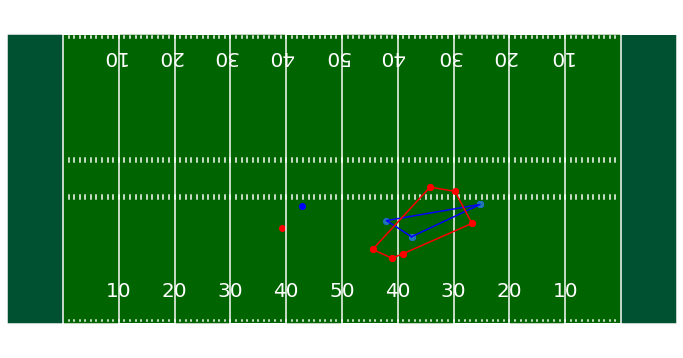

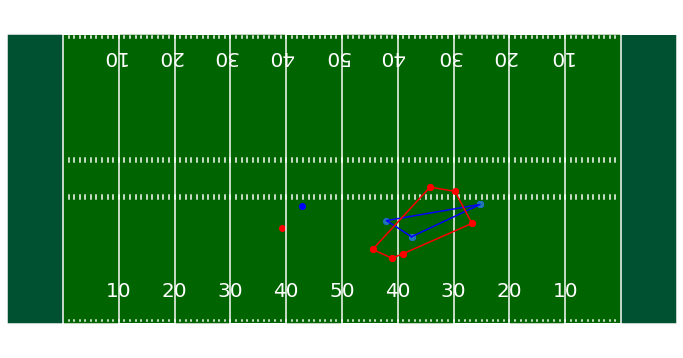

In [58]:
get_dynamic_hull(2020112906, 70, 2142, df_181)

In [17]:
df_18 = df_18[df_18.specialTeamsResult == 'Return']

In [18]:
punts = df_18.index[df_18['event'] == 'punt_received'].tolist()
tackles = df_18.index[df_18['event'] == 'tackle'].tolist()

In [19]:
df_18 = df_18[['gameId', 'playId','x_std', 'y_std', 'dir_std1', 'dir_std','frameId', 'team']]

KeyError: "['dir_std1'] not in index"

In [ ]:
len(df_18)

In [ ]:
# inds = []

# for (a, b) in zip(punts, tackles):
#     vals = list(range(a,b+1))
#     inds.append(vals)

In [ ]:
#inds = list(itertools.chain(*inds))
#df_18 = df_18[df_18.index.isin(inds)]

In [ ]:
#colNames = ['gameId', 'frameId', 'playId']

#df_18['Hull_data(A,H,int)'] = df_18.apply(lambda x: get_hull_metrics(x[colNames[0]],x[colNames[1]],x[colNames[2]]), axis=1)

In [ ]:
df_18 = df_18.dropna()

In [ ]:
df_18[(df_18.gameId == 2018090900)&(df_18.playId == 1136)][1000:2000]

no hull
no hull
no hull
no hull
no hull
no hull
no hull
no hull
no hull
no hull
no hull
no hull
no hull
no hull
no hull
no hull
no hull
no hull
no hull
no hull
no hull
no hull
no hull
no hull
no hull
no hull
no hull
no hull
no hull
no hull
no hull
no hull
no hull
no hull
no hull
no hull
no hull
no hull
no hull
no hull
no hull
no hull
no hull
no hull
no hull
no hull
no hull
no hull
no hull
no hull
no hull
no hull
no hull
no hull
no hull
no hull
no hull
no hull
no hull
no hull
no hull
no hull
no hull
no hull
no hull
no hull
no hull
no hull
no hull
no hull
no hull
no hull
no hull
no hull


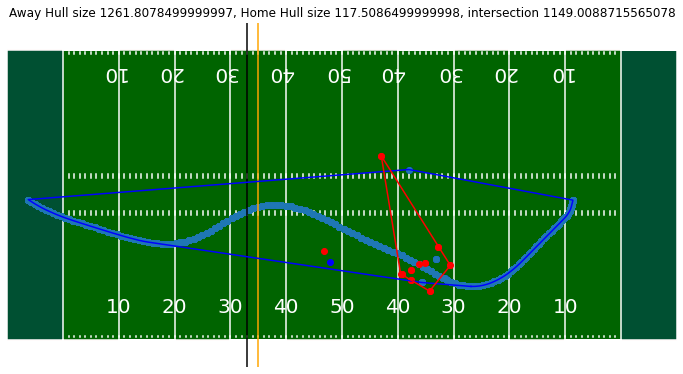

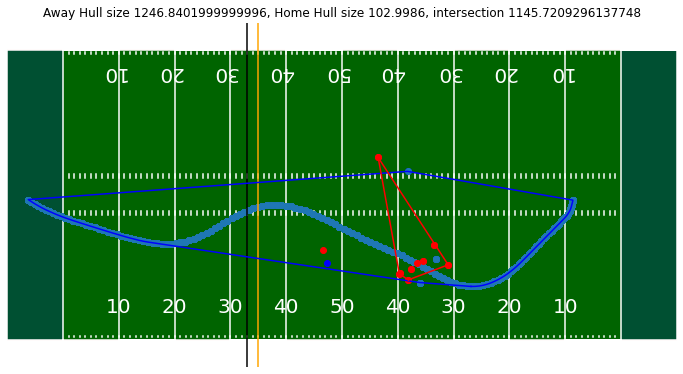

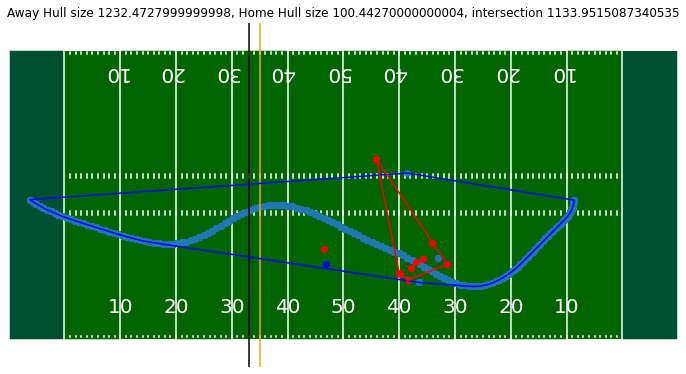

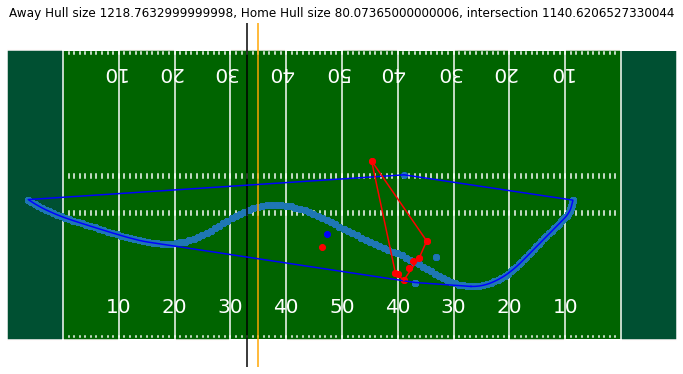

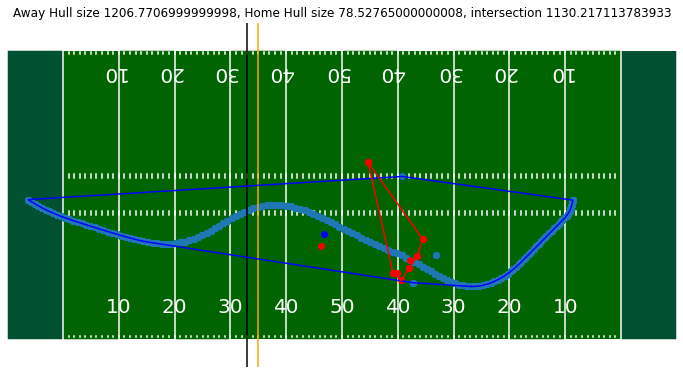

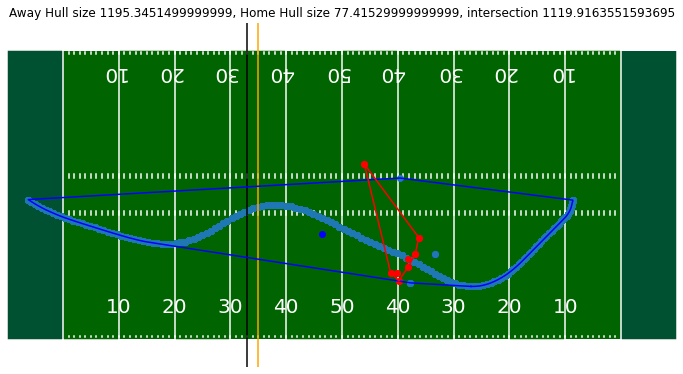

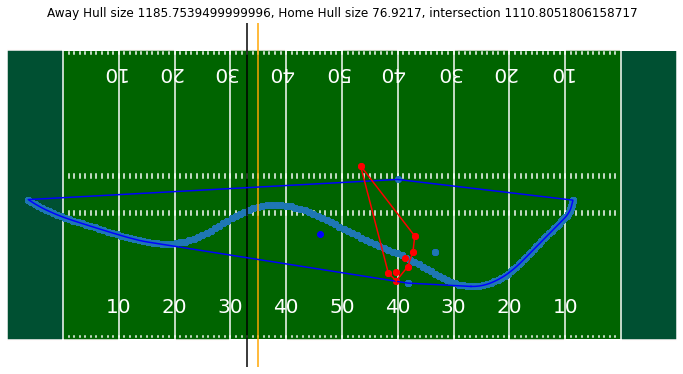

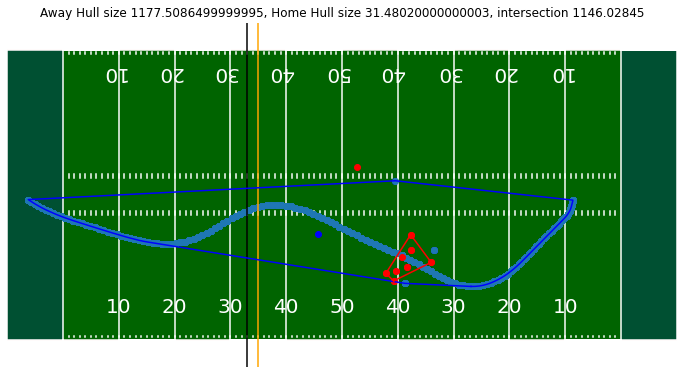

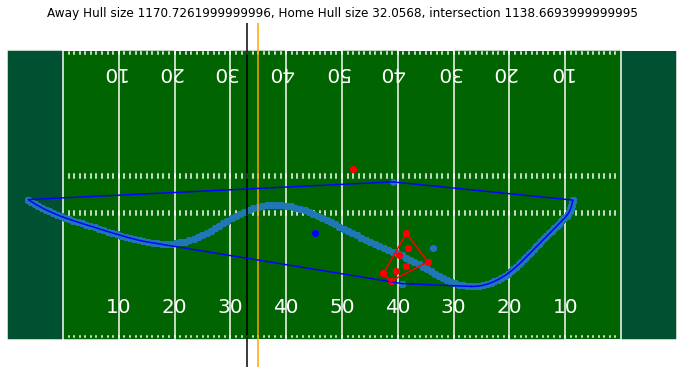

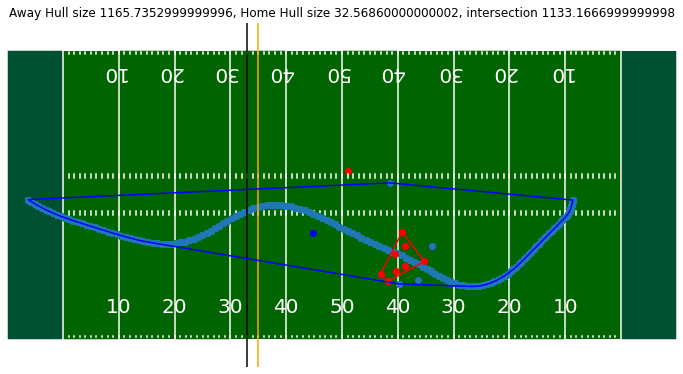

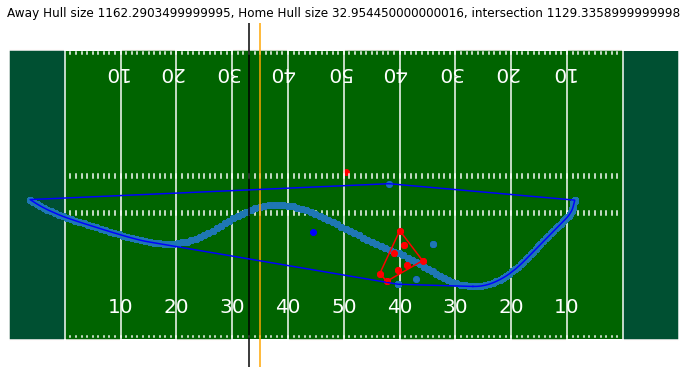

Error in callback <function flush_figures at 0x7f29d07a2170> (for post_execute):


KeyboardInterrupt: 

In [22]:
plays = [i for i in range(100,200)]
files = [str(i)+'.png' for i in range(100,200)]
for i in plays:
    get_hulls(2020112906, i,2142, df_181) 
    plt.savefig('%s.png'%i)

In [ ]:
import imageio

with imageio.get_writer('mygif.gif', mode='I', fps=4) as writer:
    for filename in files:
        image = imageio.imread(filename)
        writer.append_data(image)